<a href="https://colab.research.google.com/github/IndraniMandal/CSC310-S20/blob/master/09_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it
!test ! -e ds-assets && git clone https://github.com/IndraniMandal/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/"
import sys
sys.path.append(home)      # add home folder to module search path

Cloning into 'ds-assets'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 205 (delta 18), reused 30 (delta 13), pack-reused 164
Receiving objects: 100% (205/205), 12.58 MiB | 19.15 MiB/s, done.
Resolving deltas: 100% (78/78), done.


# Data Visualization - Of Scatter, Bars, and Pies

## Pandas Based Visualization

We looked at some basic visualization techniques in slide set [05 Processing Pipeline](https://nbviewer.jupyter.org/github/lutzhamel/ds/blob/master/notes/05-processing-pipeline.ipynb).  The good news is that Pandas dataframes know how to do a lot of predefined visualization.

Import pandas for data manipulation and visualization.

In [ ]:
import pandas as pd

Get our data set.

In [ ]:
iris_df = pd.read_csv(home+"iris.csv")

In [ ]:
iris_df.head()

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


Drop the `id` column because there is no information there. Notice that we are doing this **in place**!

In [ ]:
iris_df.drop(['id'], axis=1, inplace=True)

## Basic Plots

Arguably the most important plots, that is, plots that data scientists most frequently use are:
* The **histogram** for displaying basic distribution information of **numeric columns**.
* The **bar plot** for displaying basic mode information for **categorical columns**.
* The **scatter plot** for displaying basic relationships between two variables and the two variables are **numeric**.

### The **Histogram**

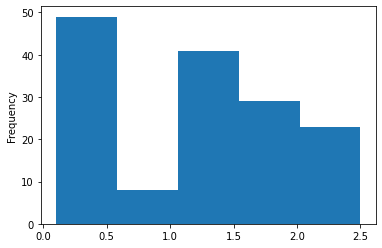

In [ ]:
iris_df['Petal.Width'].plot.hist(bins=5)

The problem with histograms is that they are very sensitive to the number of bins. Try the graph above with 10 bins; you get a very different looking graph.  Density plots avoid that.

### The Density Plot

An alternative to histograms are density plots (kernel density estimators - kde) which display the same information in a continuous format.

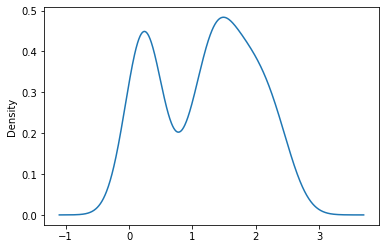

In [ ]:
iris_df['Petal.Width'].plot.kde()

Notice that here we always see the two peaks which got lost when we chose the number of bins too large in the historgrams.

### The **Bar Chart**

Here we have to do some preprocessing before we can plot the levels of the column - we have to actually count the number of times particular levels occur in a categorical column.  The  function `value_counts` can be applied the categorical columns which creates a table of the number of times each label occurred in a column.

In [ ]:
iris_df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

Let's build the graph.

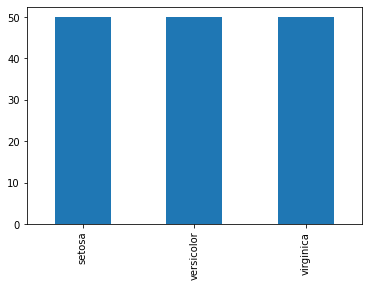

In [ ]:
iris_df['Species'].value_counts().plot.bar()

### The Pie Chart

The same information as the bar chart can be displayed in a visually appealing **pie chart**.  The only caveat
here is that we want to get rid of the column/series name because the package displays it in kind of a strange fashion.

In [ ]:
plot_series = iris_df['Species']
plot_series.name = '' # get rid of the 'Species' label

Remember: a *series* is just a 1-D dataframe.

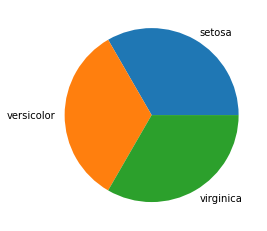

In [ ]:
plot_series.value_counts().plot.pie() # plot the value counts of the labels

### Scatter Plots

Scatter plots allow us to examine the relationship between **numeric** columns in a dataframe.

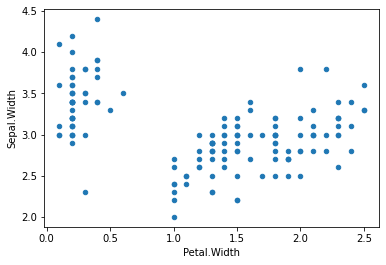

In [ ]:
iris_df.plot.scatter(x='Petal.Width', y='Sepal.Width')


We can add color to the plot based on the species labels.

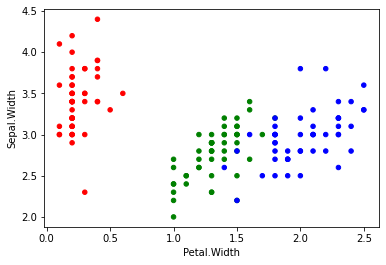

In [ ]:
# a function that maps flower labels into color labels
def fn_color(x):
  if x == 'setosa':
    return 'red'
  elif x == 'virginica':
    return 'blue'
  else: # versicolor
    return 'green'

# create a color vector based on the Species column
color_vector = iris_df['Species'].map(fn_color)

# create a scatter plot using the color vector
iris_df.plot.scatter(x='Petal.Width', y='Sepal.Width',c=color_vector)

As you can see, this is a powerful visualization technique by showing us that based on these two columns we basically can classify the iris dataset into three well defined clusters.

### Scatter Matrix

Rather than looking at each column pair individual the `scatter_matrix` function allows the user view all the pairwise relationships in one go.

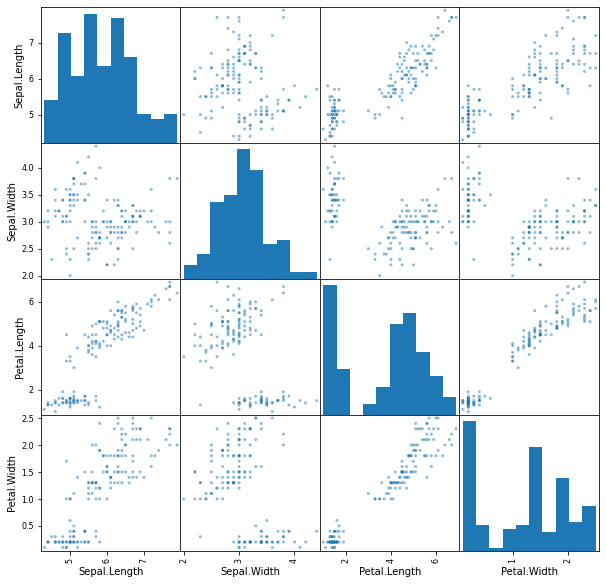

In [ ]:
null = pd.plotting.scatter_matrix(iris_df, figsize=[10,10])

As with the individual scatter plots, we can add color to the scatter plot matrix.

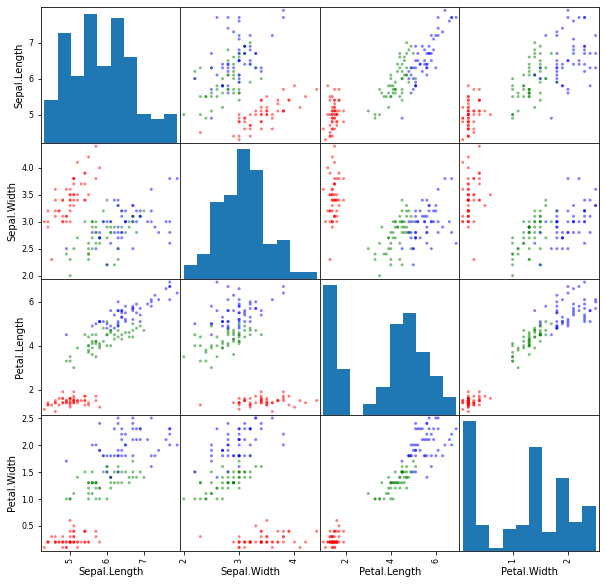

In [ ]:
# map flower labels into color labels
def fn_color(x):
  if x == 'setosa':
    return 'red'
  elif x == 'virginica':
    return 'blue'
  else: # versicolor
    return 'green'

# compute a color vector
color_vector = iris_df['Species'].map(fn_color)

# use the color vector in the plot
null = pd.plotting.scatter_matrix(iris_df, figsize=[10,10],c=color_vector)

### Basic Plotting Summary

* ‘bar’ or ‘barh’ for bar plots
* ‘hist’ for histogram
* ‘box’ for boxplot
* ‘kde’ or 'density' for density plots
* ‘area’ for area plots
* ‘scatter’ for scatter plots
* ‘hexbin’ for hexagonal bin plots
* ‘pie’ for pie plots

For more info [Pandas Basic Plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html#basic-plotting-plot).

## Seaborn Based Visualization

[Seaborn](http://seaborn.pydata.org) is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.  Seaborn integrates nicely with Pandas dataframes.

In [2]:
import pandas as pd
import seaborn as sns
sns.set()

Let's repeat the experiments from above but with Seaborn.

In [3]:
iris_df = pd.read_csv(home+"iris.csv")
iris_df.drop(['id'], axis=1, inplace=True)

### Histograms

In the Seaborn world this is done with [`distplot`](http://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot). Notice that we can plot the density plot and the histogram right on top of each other.  Try this with different bins (e.g. bins=10).

<Axes: xlabel='Petal.Width', ylabel='Density'>

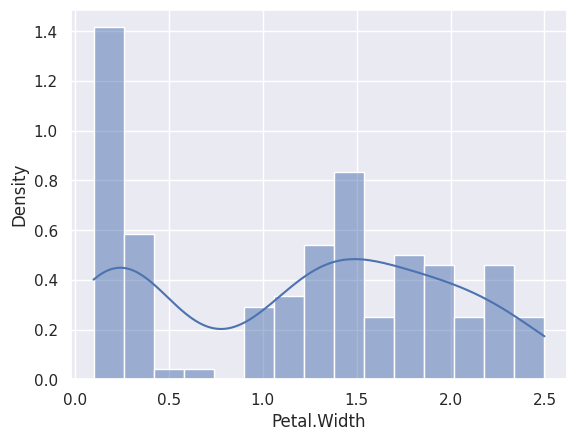

In [18]:
sns.histplot(iris_df['Petal.Width'], kde=True, stat="density", bins = 15)

<Axes: xlabel='Petal.Width', ylabel='Count'>

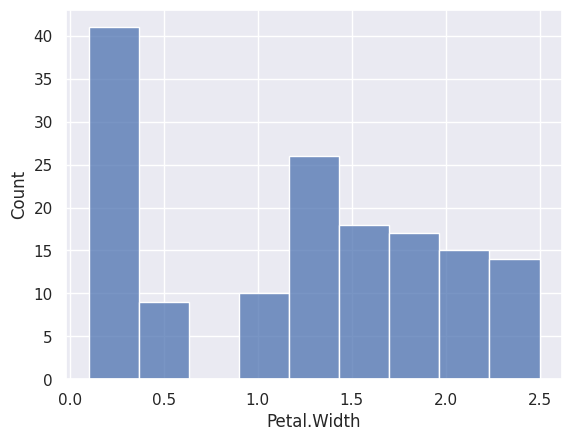

In [16]:
sns.histplot(iris_df.loc[:,'Petal.Width'])

**Note**: if you do not specify *bins* then `distplot` will compute a default number of bins.

<Axes: xlabel='Petal.Width', ylabel='Density'>

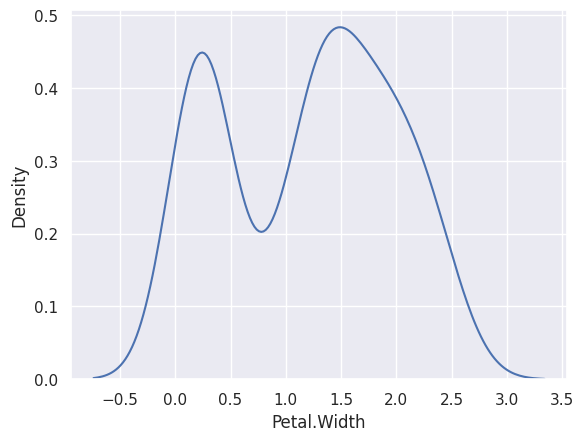

In [19]:
sns.kdeplot(iris_df['Petal.Width'])

### Bar Charts

Seaborn also supports bar charts called [`countplots`](http://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


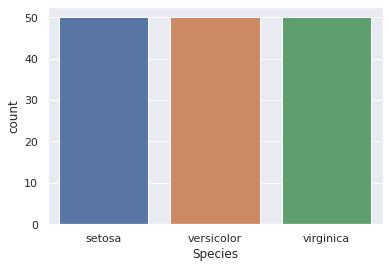

In [ ]:
sns.countplot(iris_df['Species'])

Notice that there is **no preprocessing necessary** compared to the Pandas bar charts.

### Scatter Plots

Seaborn does things just a bit different than expected...scatter plots are called [`pairplots`](http://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot).  This is where Seaborn really shines.  The defaults are set up in just the right way to give you maximum information and very attractive graphs. All we have to do is to tell it to use the Species column for colors (the hue parameter).  It does the rest for you.  Also, by default it computes the density plots broken out by label rather than histograms.

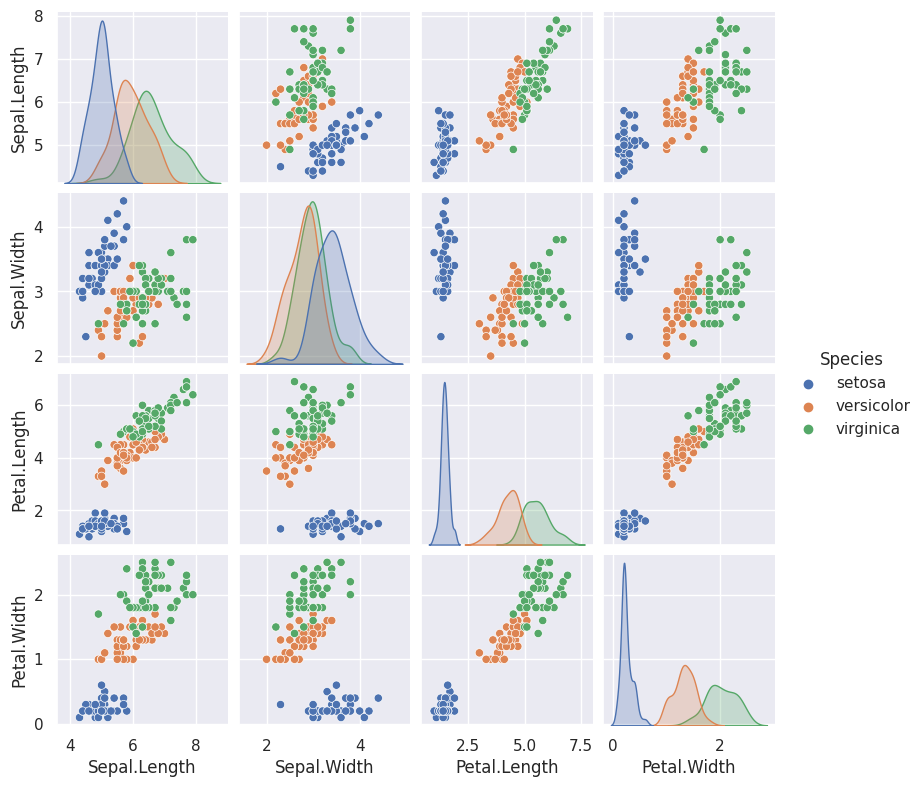

In [22]:
sns.pairplot(iris_df, hue='Species', height=2)

We can also look at individual pairs of variables.

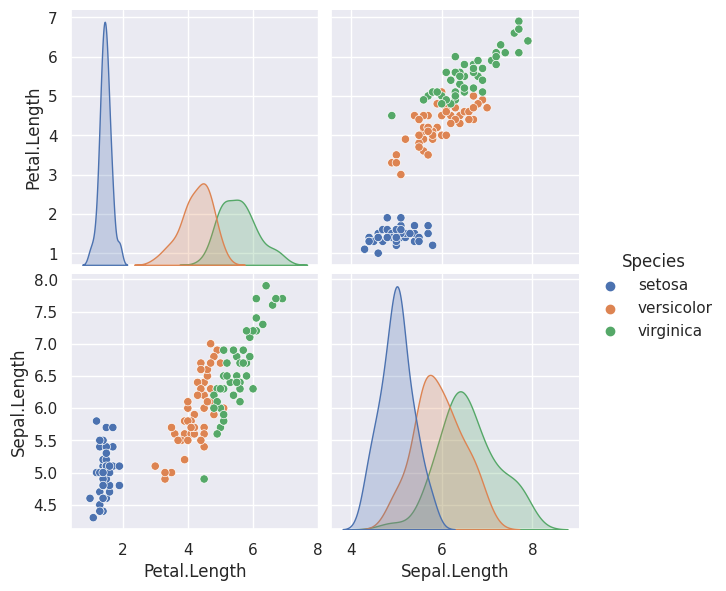

In [24]:
sns.pairplot(iris_df, hue='Species', height=3, vars=["Petal.Length", "Sepal.Length"])

Seaborn has another plot called the [`jointplot`](http://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot) that allows you to compare two variables.  Here is one that draws a scatterplot with marginal density plots.

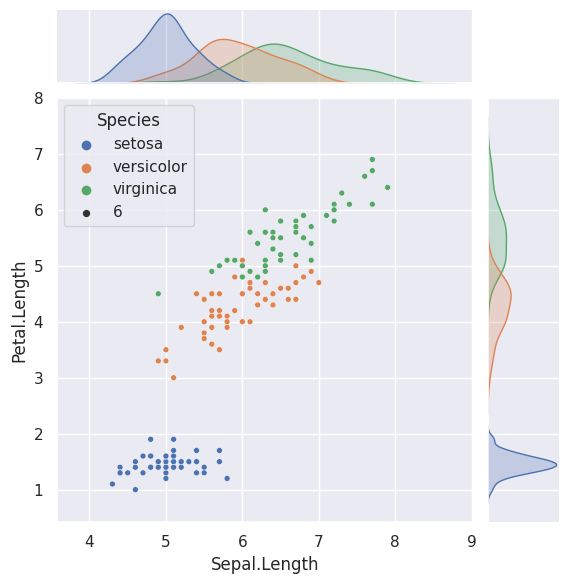

In [25]:
sns.jointplot(x="Sepal.Length", y="Petal.Length", hue='Species', data=iris_df, size=6)

Same thing but here we plot a density plot.

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'size'
  cset = contour_func(


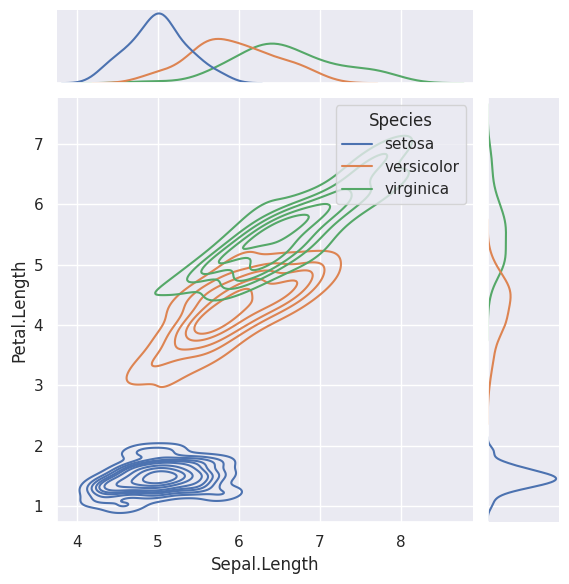

In [26]:
sns.jointplot(x="Sepal.Length", y="Petal.Length", hue='Species', data=iris_df, size=6, kind="kde", color="g")

# Visualizations and Models

Let's see if we can relate our decision tree model to what we are seeing in the data for the Iris data set.

In [ ]:
import pandas as pd
from sklearn import tree
from treeviz import tree_print
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
iris_df = pd.read_csv(home+"iris.csv")

Create the feature matrix and the target vector.

In [ ]:
features_df = iris_df.drop(['id','Species'],axis=1)
features_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
target_df = pd.DataFrame(iris_df['Species'])
target_df.head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


Build and visualize a tree model.

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(features_df,target_df)
tree_print(dtree,features_df)

if Petal.Length =< 2.449999988079071: 
  |then setosa
  |else if Petal.Width =< 1.75: 
  |  |then if Petal.Length =< 4.950000047683716: 
  |  |  |then if Petal.Width =< 1.6500000357627869: 
  |  |  |  |then versicolor
  |  |  |  |else virginica
  |  |  |else if Petal.Width =< 1.550000011920929: 
  |  |  |  |then virginica
  |  |  |  |else if Sepal.Length =< 6.949999809265137: 
  |  |  |  |  |then versicolor
  |  |  |  |  |else virginica
  |  |else if Petal.Length =< 4.8500001430511475: 
  |  |  |then if Sepal.Width =< 3.100000023841858: 
  |  |  |  |then virginica
  |  |  |  |else versicolor
  |  |  |else virginica
<------------->
Tree Depth:  5


Too complicated, let's reduce the complexity of the model a bit by limiting it to a depth of 2.

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2,random_state=4)
dtree.fit(features_df,target_df)
tree_print(dtree,features_df)

if Petal.Length =< 2.449999988079071: 
  |then setosa
  |else if Petal.Width =< 1.75: 
  |  |then versicolor
  |  |else virginica
<---->
Tree Depth:  2


Compute the accuracy of our new model.

In [ ]:
predict_array = dtree.predict(features_df)      # produces an array of labels
predicted_labels = pd.DataFrame(predict_array)  # turn it into a DF
predicted_labels.columns = ['Species']          # name the column - same name as in target!
print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels)))

Our model accuracy is: 0.96


Even though we limited our tree model to a max depth of 2 we are still able to construct a model with an accuracy of 96%!  That is, our tree model is still able to pick up the most important trends in the data.

Let's plot our tree model ontop of the scatter plot of the `Petal.Length` and `Petal.Width` variables.  These are the variables that show up in our model above.


In [ ]:
shrink_df = iris_df[['Petal.Width','Petal.Length','Species']]
shrink_df.head()

,Petal.Width,Petal.Length,Species
0,0.2,1.4,setosa
1,0.2,1.4,setosa
2,0.2,1.3,setosa
3,0.2,1.5,setosa
4,0.2,1.4,setosa


Split the dataframe into three dataframes according to the labels.

In [ ]:
setosa_df = shrink_df[shrink_df.Species == 'setosa']
versicolor_df = shrink_df[shrink_df.Species == 'versicolor']
virginica_df = shrink_df[shrink_df.Species == 'virginica']

Plot the flower data and then plot the tree model ontop of the flower data.

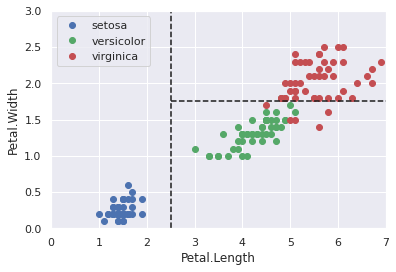

In [ ]:
# scatter plot of the data
plt.plot(setosa_df['Petal.Length'],setosa_df['Petal.Width'],'bo')
plt.plot(versicolor_df['Petal.Length'],versicolor_df['Petal.Width'],'go')
plt.plot(virginica_df['Petal.Length'],virginica_df['Petal.Width'],'ro')
plt.axis([0, 7, 0, 3])
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend(['setosa','versicolor','virginica'])

# plotting the tree decision surfaces
plt.plot([2.5,2.5],[0,3.0],'k--')
plt.plot([2.5,7.0],[1.75,1.75], 'k--')

In [ ]:
# repeat the model visualization here for easy interpretation on the graph
tree_print(dtree,features_df)

if Petal.Length =< 2.449999988079071: 
  |then setosa
  |else if Petal.Width =< 1.75: 
  |  |then versicolor
  |  |else virginica
<---->
Tree Depth:  2


Once we plot our tree model ontop of the flower data we find that our model found the patterns in the data that allows the separation of the three classes of iris flowers with minimal errors. The decision tree is also often called a *piecewise linear model* because it induces *linear decision surfaces* within the data.

# Reading

* 4.5 [Histograms, Binnings, and Density](https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html)
* 4.14 [Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)
* [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
* [Seaborn Homepage](http://seaborn.pydata.org/index.html)
* [Matplotlib Pyplot Tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)
